# BWT - Deep Learning Track
## Topics : Overfitting, Underfitting, Regularization
### Adil Mubashir Chaudhry

## Overfitting and Underfitting

We saw in the previous excersises that after a few epochs our performance on the validation set started to degrade. This was a case of the training data being overfit. 

The funndamental issue in machinie learning is the tension beween optimizatoin and generalization
__Optimization__ refers to the process of adjusting a model to get the best possible performance on training data.
__Generalization__ refers to how well the trained model performs on data it has never seen before.

After certain itterations on the training data, the model starts to learn patterns that are specific to the training data but misleading for new data. 

The best solution to this problem is to _get more training data_. But what if we dont have that option. In that case we will force the model to only give higher weights to features of most importance. This process of fighting overfitting is ccalled _regularization_

### Reducing the Network Size

The simplest method would be to reduce the network size of our model : reduce the number of learnable parameters which is determined by the number of layers and the number of units per layer. At the same time we need to be mindful of the fact that our model needs enough learnable parameters as to not underfit. Unfortunately there is no formula on how to get this right but its an itterative process of trail and error.

Lets now try reducing the number of paramters using the IMDB dataset we had previously used.

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
import numpy as np

In [3]:
def vectorize_sequence(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers

our previous model had the following model

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='relu'))

now we will make a version with lower capacity

In [6]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
from keras import optimizers
from keras import metrics
from keras import losses

In [8]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6028 - binary_accuracy: 0.7559 - val_loss: 0.5191 - val_binary_accuracy: 0.8450
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4470 - binary_accuracy: 0.8756 - val_loss: 0.4121 - val_binary_accuracy: 0.8656
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3446 - binary_accuracy: 0.8979 - val_loss: 0.3452 - val_binary_accuracy: 0.8804
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2764 - binary_accuracy: 0.9162 - val_loss: 0.3123 - val_binary_accuracy: 0.8836
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2311 - binary_accuracy: 0.9286 - val_loss: 0.3029 - val_binary_accuracy: 0.8791
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1999 - binary_accuracy: 0.9381 - val_loss: 0.2800 - val_binary_accuracy: 0.8905
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - los

In [9]:
import matplotlib.pyplot as plt

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

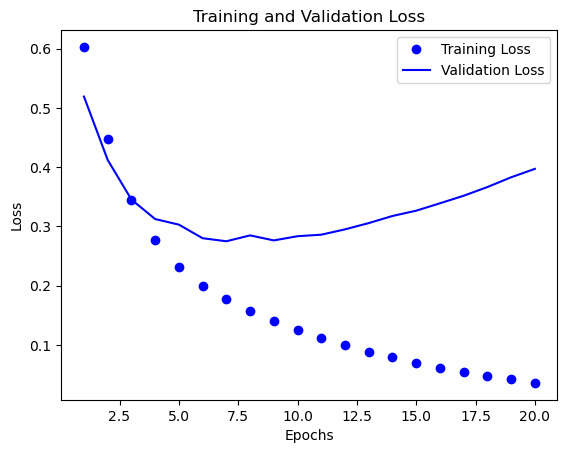

In [11]:
loss_value = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_value, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Compared to the previous validation loss (image below) the new model seems to have less overfitting, however wew can see that the model still starts overfitting after about 5 epochs of training

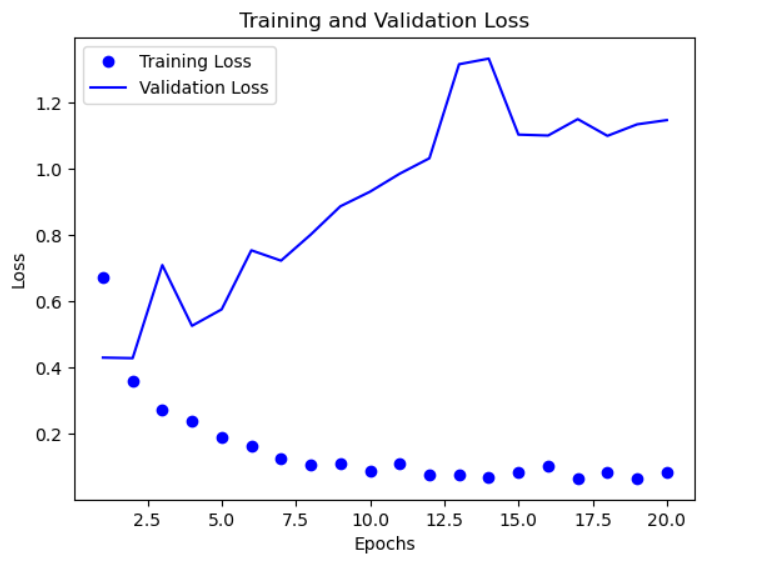


### Adding weight regularization

A common way to mitigate overfitting is to put constrains on the complexity of a network by forcing its weights to take only small values which makes the distribution of weights more _regular_. This is called _weight regularization_. This is done by adding an additional term to the loss function and has 2 types:
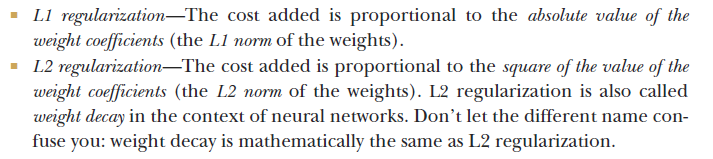

lets now build the model with l2 regularization instead and check the results

In [12]:
from keras import regularizers

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5701 - binary_accuracy: 0.7837 - val_loss: 0.4454 - val_binary_accuracy: 0.8573
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3650 - binary_accuracy: 0.8979 - val_loss: 0.3618 - val_binary_accuracy: 0.8817
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2862 - binary_accuracy: 0.9207 - val_loss: 0.3351 - val_binary_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2416 - binary_accuracy: 0.9393 - val_loss: 0.3692 - val_binary_accuracy: 0.8694
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2243 - binary_accuracy: 0.9441 - val_loss: 0.3387 - val_binary_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2056 - binary_accuracy: 0.9507 - val_loss: 0.3342 - val_binary_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - los

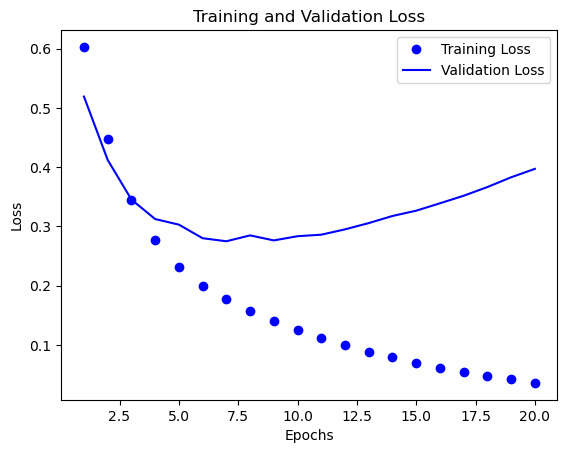

In [16]:
loss_value = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_value, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

comparing the validation loss of the original larger model and the new larger model with regularization we an see that regularizing our model decreased the validation loss significantly. Therefore, reducing the chance of overfitting on our training data.